# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


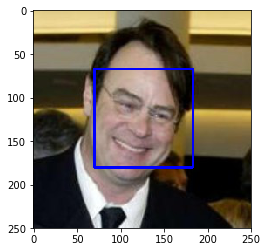

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

-Human detected in Human: 98.000%  
-Human detected in Dogs: 17.000%

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
detected_human=detected_dogs=0
for img in human_files_short:
    if face_detector(img):
        detected_human +=1

for img in dog_files_short:
    if face_detector(img):
        detected_dogs +=1        

print('Human detected in Human: {:.3f}%'.format(detected_human))    
print('Human detected in Dogs: {:.3f}%'.format(detected_dogs))       

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


Human detected in Human: 98.000%
Human detected in Dogs: 17.000%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 102224479.85it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    img = Image.open(img_path)
    transform= transforms.Compose([transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])
    img = transform(img)
    img = img.unsqueeze(dim=0)
    if use_cuda:
        img = img.cuda()
    output=VGG16(img)
    _,idx = torch.max(output,1)
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    return idx[0] # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    detected = False
    if (VGG16_predict(img_path) in range(151,269)):
        detected=True
    return detected # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  
Dog detected in Human: 1.000%  
Dog detected in Dogs: 90.000%

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
detected_human=detected_dogs=0
for img in human_files_short:
    if dog_detector(img):
        detected_human +=1

for img in dog_files_short:
    if dog_detector(img):
        detected_dogs +=1        

print('Dog detected in Human: {:.3f}%'.format(detected_human))    
print('Dog detected in Dogs: {:.3f}%'.format(detected_dogs))     

Dog detected in Human: 1.000%
Dog detected in Dogs: 90.000%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [4]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models
inception = models.inception_v3(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    inception = inception.cuda()


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 67578517.64it/s]


In [5]:
def inception_predict(img_path):
    '''
    Use pre-trained Inception model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    img = Image.open(img_path)
    transform= transforms.Compose([transforms.CenterCrop(299),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])
    img = transform(img)
    img = img.unsqueeze(dim=0)
    if use_cuda:
        img = img.cuda()
    inception.eval()
    with torch.no_grad():
        output=inception(img)
    _,idx = torch.max(output,1)
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    return idx[0] # predicted class index
def dog_detector_IN(img_path):
    ## TODO: Complete the function.
    detected = False
    if (inception_predict(img_path) in range(151,269)):
        detected=True
    return detected # true/false

In [13]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
detected_human=detected_dogs=0
for img in human_files_short:
    if dog_detector_IN(img):
        detected_human +=1

for img in dog_files_short:
    if dog_detector_IN(img):
        detected_dogs +=1        

print('Dog detected in Human: {:.3f}%'.format(detected_human))    
print('Dog detected in Dogs: {:.3f}%'.format(detected_dogs))  

Dog detected in Human: 1.000%
Dog detected in Dogs: 98.000%


__Comment__:  
The results resembles this of the VGG16 model, although the Inception V3 model was reported to have less Top-1 error by 5% which is shown in this results. In our case, the inception model gives a higher performance in dog detection (detected dogs 8% more than VGG16), however the same performance in the case of the human detection. 

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [8]:
from PIL import Image,ImageFile
import torch
import torchvision.transforms as transforms
import torchvision.models as models
# check if CUDA is available
use_cuda = torch.cuda.is_available()
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [9]:
import os
from torchvision import datasets, transforms
batch_size = 32
num_workers=0

train_dir ='/data/dog_images/train'
valid_dir ='/data/dog_images/valid'
test_dir = '/data/dog_images/test'
#transforms for training contain data augmentation transformation
train_transform= transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomRotation(15),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
#transforms for testing and Validations
test_transform= transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
#Getting data from image folders 
train_data = datasets.ImageFolder(train_dir,transform=train_transform)
valid_data =datasets.ImageFolder(valid_dir,transform=test_transform)
test_data=datasets.ImageFolder(test_dir,transform=test_transform)

print("Training data: ",len(train_data))
print("Validation data: ",len(valid_data))
print("Testing data: ",len(test_data))



Training data:  6680
Validation data:  835
Testing data:  836


In [10]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders_scratch= {'train':train_loader,'valid':valid_loader,'test':test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  
I choose to resize the image by RandomResizedCrop to the size 224x224 to be similar to that of the pretrained networks to make the comparison of performance independent on the input image size.  
I decided to augment the dataset to add randomness and variety especially that dogs can be found in different poses. I added Random Rotation (for that I imagined as if the dog is tilting its head), and also Random Horizontal Flip. I also added normalization to the transfroms for the sake of comparison with the ready made models. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [21]:
torch.cuda.empty_cache() 

In [10]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1= nn.Conv2d(3,16,3,padding=1)
        self.conv2= nn.Conv2d(16,32,3,padding=1)
        self.conv3= nn.Conv2d(32,64,3,padding=1)
        
        self.fc1=nn.Linear(28*28*64,1024)
        self.fc2=nn.Linear(1024,133)
        
        self.pool = nn.MaxPool2d(2,2)
        self.drop = nn.Dropout(0.2)
    
    def forward(self, x):
        ## Define forward behavior
        #Feature extractor
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
                
        
        x = x.view(x.shape[0],-1)
        
        #Classifier
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__   
The main thought is that may be the model doesn't need to be too complex in the feature extraction part but it's more complex in the classification. So, the first idea is to use a simplified model in the same style of the VGGnet with cutting some convolution layers and three fully connected layers. 
I encountered an out of memory error so I simplified my model by removing some of convolution layers.  

The model starts training but with no significant improvment between epochs, I tried different learning rates but it makes no difference, also I tried the SGD optimizer instead Adam but it's doesn't solve the problem. So, I assumed that may be the parameters space is too complex. So, I simplified the model more by removing one fully connected layer and decreased the depth of the convolution layers.  

The model starts to train nicely after that and surpassed the minimum requirement. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [11]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [7]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output =model(data)
            loss = criterion(output,target)
            loss.backward()
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output =model(data)
            loss = criterion(output,target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            ## record the average training loss, using something like
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss<=valid_loss_min):
            torch.save(model.state_dict(),save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.809811 	Validation Loss: 4.693055
Epoch: 2 	Training Loss: 4.551442 	Validation Loss: 4.484378
Epoch: 3 	Training Loss: 4.432469 	Validation Loss: 4.339661
Epoch: 4 	Training Loss: 4.316911 	Validation Loss: 4.258757
Epoch: 5 	Training Loss: 4.227297 	Validation Loss: 4.200299
Epoch: 6 	Training Loss: 4.144228 	Validation Loss: 4.079536
Epoch: 7 	Training Loss: 4.078394 	Validation Loss: 3.965641
Epoch: 8 	Training Loss: 4.029025 	Validation Loss: 3.794672
Epoch: 9 	Training Loss: 3.957272 	Validation Loss: 3.759875
Epoch: 10 	Training Loss: 3.905143 	Validation Loss: 3.731516
Epoch: 11 	Training Loss: 3.853457 	Validation Loss: 3.721999
Epoch: 12 	Training Loss: 3.791391 	Validation Loss: 3.594251
Epoch: 13 	Training Loss: 3.749044 	Validation Loss: 3.498417
Epoch: 14 	Training Loss: 3.686864 	Validation Loss: 3.426427
Epoch: 15 	Training Loss: 3.647765 	Validation Loss: 3.346385
Epoch: 16 	Training Loss: 3.593014 	Validation Loss: 3.254799
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.327706


Test Accuracy: 19% (164/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [6]:
## TODO: Specify data loaders
import os
from torchvision import datasets, transforms
batch_size = 32
num_workers=0

train_dir ='/data/dog_images/train'
valid_dir ='/data/dog_images/valid'
test_dir = '/data/dog_images/test'
#transforms for training contain data augmentation transformation
train_transform= transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomRotation(15),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
#transforms for testing and Validations
test_transform= transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
#Getting data from image folders 
train_data = datasets.ImageFolder(train_dir,transform=train_transform)
valid_data =datasets.ImageFolder(valid_dir,transform=test_transform)
test_data=datasets.ImageFolder(test_dir,transform=test_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders_transfer= {'train':train_loader,'valid':valid_loader,'test':test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [7]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.densenet161(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = False
model_transfer.classifier = nn.Linear(2208,133)
#print(model_transfer)
if use_cuda:
    model_transfer = model_transfer.cuda()

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.torch/models/densenet161-8d451a50.pth
100%|██████████| 115730790/115730790 [00:01<00:00, 79199981.89it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  
1) I chose to use the denseNet161 as my pretrained network because the network is among the top performing networks in the ImageNet dataset, also it's training is simpler (for me at this stage) than the inception net as the later is a recurrent network.  
2) As the project dataset is small and relatively similar to subset of the ImageNet dataset, I chose to use the pretrained weights of the feature extraction part of the network and replace the classifier part with one that is suitable to number of classes in the project.  
3) Training was done on the classifier weights only for 30 epochs which shows a converging training and testing losses. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [12]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
model_transfer = train(30, loaders_transfer, model_transfer, optimizer_transfer, 
                      criterion_transfer, use_cuda, 'model_transfer.pt')
# train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.111037 	Validation Loss: 1.281132
Epoch: 2 	Training Loss: 1.150763 	Validation Loss: 0.857166
Epoch: 3 	Training Loss: 0.962156 	Validation Loss: 0.717214
Epoch: 4 	Training Loss: 0.856259 	Validation Loss: 0.625304
Epoch: 5 	Training Loss: 0.768107 	Validation Loss: 0.574865
Epoch: 6 	Training Loss: 0.766734 	Validation Loss: 0.569401
Epoch: 7 	Training Loss: 0.736675 	Validation Loss: 0.527223
Epoch: 8 	Training Loss: 0.685030 	Validation Loss: 0.438301
Epoch: 9 	Training Loss: 0.671727 	Validation Loss: 0.470398
Epoch: 10 	Training Loss: 0.678729 	Validation Loss: 0.435857
Epoch: 11 	Training Loss: 0.644720 	Validation Loss: 0.375015
Epoch: 12 	Training Loss: 0.624571 	Validation Loss: 0.453768
Epoch: 13 	Training Loss: 0.605440 	Validation Loss: 0.457829
Epoch: 14 	Training Loss: 0.641792 	Validation Loss: 0.357986
Epoch: 15 	Training Loss: 0.604281 	Validation Loss: 0.367565
Epoch: 16 	Training Loss: 0.590007 	Validation Loss: 0.386168
Epoch: 17 	Traini

FileNotFoundError: [Errno 2] No such file or directory: 'model_transfer.pt'

__DISCLAIMER:__  
Error happened after training as the file name in the save command was different than that of the load command, it was renamed to and the command is repeated successfully in the code down. However, I didn't repeat the cell as it will take a lot of GPU time to do the the training again.

In [13]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [18]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.654847


Test Accuracy: 80% (671/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [14]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    img = Image.open(img_path)    
    transform= transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
    img = transform(img)
    img = img.unsqueeze(dim=0)
    if use_cuda:
        img = img.cuda()
    model_transfer.eval()
    with torch.no_grad():
        output=model_transfer(img)
    _,idx = torch.max(output,1)
    return class_names[idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [15]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img= Image.open(img_path)
    if (dog_detector_IN(img_path)):
        print('Nice dog!')
        plt.imshow(img)
        plt.show()
        breed = predict_breed_transfer(img_path)
        print('Hmmm... Looks like ', breed)
    elif (face_detector(img_path)):
        print('Hello, where\'s your dog?')
        plt.imshow(img)
        plt.show()
        breed = predict_breed_transfer(img_path)
        print('I you would like to get one get a ', breed,', it will look like you.')
    else:
        print('Sorry! Couldn\'t detect neither dog nor human')
        
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)  

It's a little better than I expected, but it's not robust, as the it provides different outputs for the same input in different runs. I think also that a complex problem like this, needs a larger dataset. The training samples was 6680 samples, which means there's on average of 50 image per each class. I think this is not enough for training a neural network, especially from scratch. Other than that, may be the following points will improve the algorithm:  

1) Predicting human resemblence to dog breed based on only the face, by cropping the detected face from the original image and feed it to the network.  
2) The model size is very big, may be we could use one of the model compression techniques or train a simplified version of the model to be able to deploy it on mobile phones as an example.  
3) Resizing and cropping images with different size and aspect ratio may be introduced some distortion in the input data, May be there's a better way for preprocessing data.  
4) Giving more training time to the transfer_model as it achieved very good results on training for only 30 epochs. I settled down for this results as it surpasses the minimum requirememt, however I think it can do better.  


Hello, where's your dog?


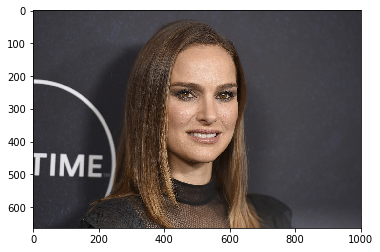

I you would like to get one get a  Bearded collie , it will look like you.
Hello, where's your dog?


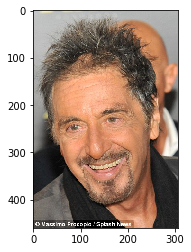

I you would like to get one get a  Dachshund , it will look like you.
Hello, where's your dog?


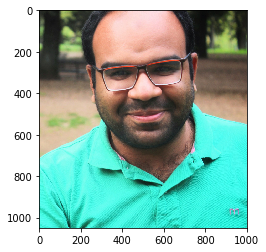

I you would like to get one get a  Ibizan hound , it will look like you.
Hello, where's your dog?


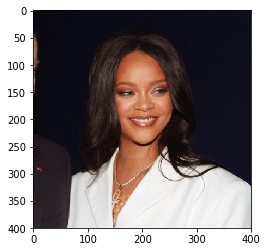

I you would like to get one get a  Anatolian shepherd dog , it will look like you.
Nice dog!


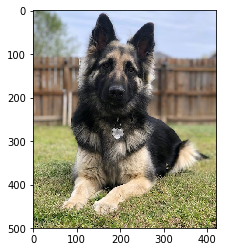

Hmmm... Looks like  German shepherd dog
Nice dog!


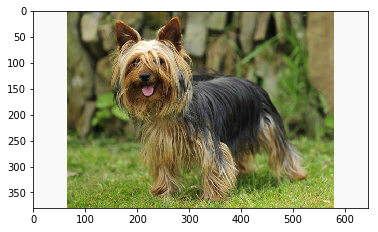

Hmmm... Looks like  Yorkshire terrier
Nice dog!


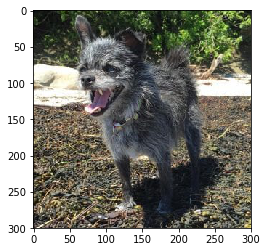

Hmmm... Looks like  Affenpinscher
Nice dog!


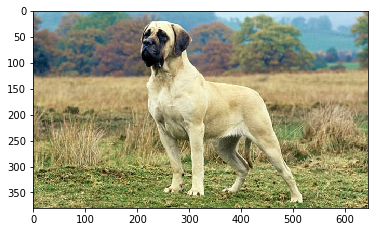

Hmmm... Looks like  Anatolian shepherd dog


In [18]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
human_files = np.array(glob("testImages/HumanImages/*"))
dog_files = np.array(glob("testImages/DogImages/*"))

## suggested code, below
for file in np.hstack((human_files[:4], dog_files[:4])):
    run_app(file)
    print('===========================================')